In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from copy import deepcopy

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir(""))

import warnings
warnings.filterwarnings("ignore")

# Any results you write to the current directory are saved as output.

D:\app\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Lendo os dados de treino

In [2]:
df = pd.read_csv("PO_Generated_Data.data")

In [3]:
print("Total rows: ", len(df['L-CORE_C']))

Total rows:  1890


In [4]:
del df['key_PO']
df.head(5)

,L-CORE_C,L-SURF_C,L-O2_C,L-BP_C,SURF-STBL_C,CORE-STBL_C,BP-STBL_C,decision_C
0,1,0,0,1,1,1,1,0
1,1,2,0,2,1,1,1,2
2,2,0,0,2,1,1,0,0
3,1,0,1,2,1,2,0,0
4,1,1,0,2,1,1,1,0


In [5]:
#df.describe()

In [6]:
df.columns

Index(['L-CORE_C', 'L-SURF_C', 'L-O2_C', 'L-BP_C', 'SURF-STBL_C',
       'CORE-STBL_C', 'BP-STBL_C', 'decision_C'],
      dtype='object')

Método para selecionar apenas as variáveis que serão utilizadas para a construção do modelo

In [7]:
def selecionar_variaveis_df(dados, se_dados_teste=False):
    if se_dados_teste == False:
        decision = dados['decision_C']
        return decision, dados[['L-CORE_C', 'L-SURF_C', 'L-O2_C', 'L-BP_C', 'SURF-STBL_C', 'CORE-STBL_C', 'BP-STBL_C']]
    
    return dados[['L-CORE_C', 'L-SURF_C', 'L-O2_C', 'L-BP_C', 'SURF-STBL_C', 'CORE-STBL_C', 'BP-STBL_C']]

In [8]:
decision, dados = selecionar_variaveis_df(df)

In [10]:
modelos = [
    ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
    ('Random Forest', RandomForestClassifier(max_depth=5, n_estimators=250, max_features=1)),
    ('AdaBoost', AdaBoostClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('MLP - neural network', MLPClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machines', SVC(gamma=2, C=1)),
    ('Linear SVC', LinearSVC()),
    ('Stochastic Gradient Descent (SGD)', SGDClassifier())    
]

In [21]:
resultados = []
nomes = []
acuracia = []
dp = []

print("######## Estimators Comparision ##########")
print('\n')
print("Total rows: ", len(df['L-CORE_C']))
print("Number of itens per decision", df.groupby('decision_C').size())
print("0:A (patient sent to general hospital floor)")
print("1:I (patient sent to Intensive Care Unit)")
print("2:S (patient prepared to go home)")
print('\n')
i=1
for nome, modelo in modelos:
    kfold = KFold(n_splits=5, random_state=100)
    #cv = cross_val_score(estimator=modelo,X=dados,y=decision,cv=kfold,scoring='r2')
    cv = cross_val_score(estimator=modelo,X=dados,y=decision,cv=kfold,scoring='accuracy')
    resultados.append(cv)
    nomes.append(nome)
    dp.append(dp)
    print(str(i)+' - '+nome+': Accuracy= ' + str(round(cv.mean()*100, 1)) + ' %'+': std= ' + str(round(cv.std()*100,1)))
    #print(str(i), "Accuracy: %0.3f (+/- %0.2f)" % (cv.mean(), cv.std() * 2))
    acuracia.append([nome,round(cv.mean()*100,1), round(cv.std()*100,1)])
    i += 1    

######## Estimators Comparision ##########


Total rows:  1890
Number of itens per decision decision_C
0    1344
1      42
2     504
dtype: int64
0:A (patient sent to general hospital floor)
1:I (patient sent to Intensive Care Unit)
2:S (patient prepared to go home)


1 - Decision Tree: Accuracy= 76.8 %: std= 0.9
2 - Random Forest: Accuracy= 79.1 %: std= 0.8
3 - AdaBoost: Accuracy= 55.6 %: std= 0.4
4 - KNN: Accuracy= 87.5 %: std= 0.9


D:\app\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\app\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\app\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\app\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

5 - MLP - neural network: Accuracy= 88.9 %: std= 0.3
6 - Naive Bayes: Accuracy= 38.9 %: std= 0.6
7 - Logistic Regression: Accuracy= 70.2 %: std= 1.0
8 - Support Vector Machines: Accuracy= 88.7 %: std= 0.5
9 - Linear SVC: Accuracy= 70.2 %: std= 1.0
10 - Stochastic Gradient Descent (SGD): Accuracy= 60.5 %: std= 13.0


In [22]:
import seaborn as sns
sns.set(style="whitegrid")
df2 = pd.DataFrame(data=acuracia, columns='Estimator Accuracy Std_Dev'.split())
df2 = df2.sort_values(['Accuracy'], ascending=[False])
df2


,Estimator,Accuracy,Std_Dev
4,MLP - neural network,88.9,0.3
7,Support Vector Machines,88.7,0.5
3,KNN,87.5,0.9
1,Random Forest,79.1,0.8
0,Decision Tree,76.8,0.9
6,Logistic Regression,70.2,1.0
8,Linear SVC,70.2,1.0
9,Stochastic Gradient Descent (SGD),60.5,13.0
2,AdaBoost,55.6,0.4
5,Naive Bayes,38.9,0.6


[Text(0,0,'MLP - neural network'),
 Text(0,0,'Support Vector Machines'),
 Text(0,0,'KNN'),
 Text(0,0,'Random Forest'),
 Text(0,0,'Decision Tree'),
 Text(0,0,'Logistic Regression'),
 Text(0,0,'Linear SVC'),
 Text(0,0,'Stochastic Gradient Descent (SGD)'),
 Text(0,0,'AdaBoost'),
 Text(0,0,'Naive Bayes')]

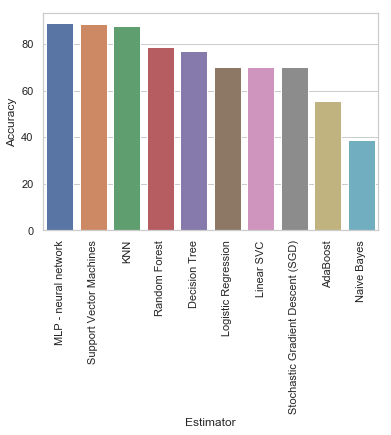

In [12]:
ax = sns.barplot(x="Estimator", y="Accuracy", data=df2)
ax.set_xticklabels(df2['Estimator'], rotation=90)